In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
mnist = tf.keras.datasets.fashion_mnist


In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

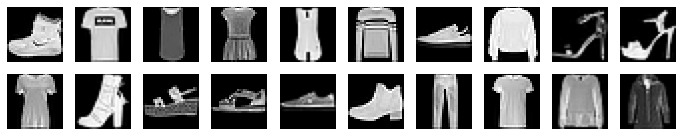

In [5]:
#check first 20 images in train
plt.figure(figsize=(12,12))
for i in range(0,20):
  plt.subplot(10,10,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.axis('off')

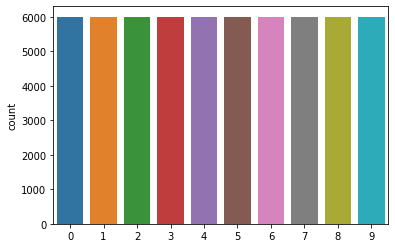

In [6]:
sns.countplot(y_train)
plt.show()

In [7]:
X_train = X_train.reshape([60000, 28, 28,1])
X_test = X_test.reshape([10000, 28, 28,1])

In [8]:
# one hot encoding of target variables
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [9]:
X_train.shape,y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [10]:
#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)
train_datagen.fit(X_train)

In [11]:
valid_datagen = ImageDataGenerator(
    rescale = 1./255
)
valid_datagen.fit(X_test)

In [12]:
model = tf.keras.models.Sequential([
                                    
            tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
            tf.keras.layers.MaxPool2D((2,2)),
            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),#64 filters /(3,3) filtersize
            tf.keras.layers.MaxPool2D((2,2)),
            tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
            tf.keras.layers.MaxPool2D((2,2)),
            tf.keras.layers.Flatten(), #convert to single vector
            tf.keras.layers.Dense(256,activation='relu'),
            tf.keras.layers.Dense(10,activation='softmax')



])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [14]:
#from keras.optimizers import Adam
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [15]:
history = model.fit(
    train_datagen.flow(X_train,y_train,batch_size=64),validation_data = valid_datagen.flow(X_test,y_test),
    batch_size=64,verbose=1,
    epochs=10)

Epoch 1/10
938/938 [==============================] - 50s 20ms/step - loss: 0.6389 - accuracy: 0.7592 - val_loss: 0.4190 - val_accuracy: 0.8432
Epoch 2/10
938/938 [==============================] - 19s 20ms/step - loss: 0.4364 - accuracy: 0.8339 - val_loss: 0.3709 - val_accuracy: 0.8670
Epoch 3/10
938/938 [==============================] - 19s 20ms/step - loss: 0.3849 - accuracy: 0.8544 - val_loss: 0.3370 - val_accuracy: 0.8769
Epoch 4/10
938/938 [==============================] - 19s 20ms/step - loss: 0.3485 - accuracy: 0.8681 - val_loss: 0.3205 - val_accuracy: 0.8808
Epoch 5/10
938/938 [==============================] - 19s 20ms/step - loss: 0.3280 - accuracy: 0.8763 - val_loss: 0.3221 - val_accuracy: 0.8866
Epoch 6/10
938/938 [==============================] - 19s 20ms/step - loss: 0.3094 - accuracy: 0.8840 - val_loss: 0.2797 - val_accuracy: 0.9002
Epoch 7/10
938/938 [==============================] - 19s 20ms/step - loss: 0.2964 - accuracy: 0.8882 - val_loss: 0.2857 - val_accuracy:

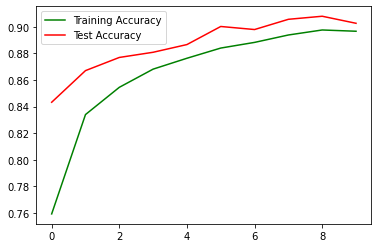

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure()
plt.plot(acc,color='g',label='Training Accuracy')
plt.plot(val_acc,color='r',label='Test Accuracy')
plt.legend()
plt.show()

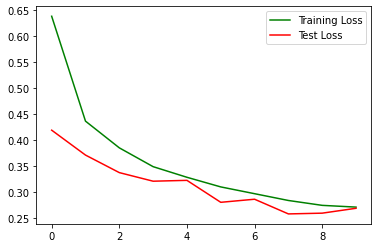

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure()
plt.plot(loss,color='g',label='Training Loss')
plt.plot(val_loss,color='r',label='Test Loss')
plt.legend()
plt.show()

In [40]:
model.predict(valid_datagen.flow(X_test))[3].argmax()

7

In [41]:
X_test.shape

(10000, 28, 28, 1)

In [44]:
y_test[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
test_data = X_test[3].reshape([28,28])

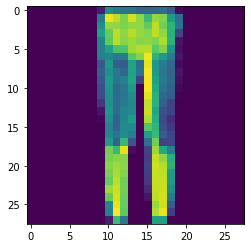

In [43]:
plt.imshow(test_data)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


In [57]:
predictions = model.predict(X_test)

In [59]:
#comparing model predictions and test labels for first 20 data
import numpy as np
for i in range(20):
  print(np.argmax(predictions[i]),np.argmax(y_test[i]))


9 9
2 2
1 1
1 1
4 6
1 1
4 4
4 6
7 5
7 7
4 4
0 5
7 7
3 3
4 4
1 1
4 2
4 4
8 8
0 0
